## 1. Image Segmentation using K-means

#### 1.1 - Importing libraries and Images

Import matplotlib, numpy, OpenCV along with the image to be segmented.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2

In [2]:
img = cv2.imread('image.jpg')

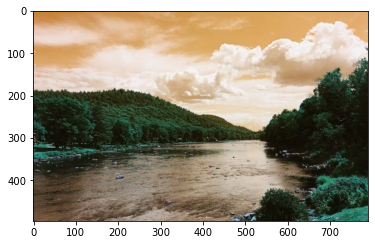

In [3]:
plt.imshow(img)

#### 1.2 - Preprocessing the Image

Preprocess the image by converting it to the RGB color space. Reshape it along the first axis to convert it into a 2D vector

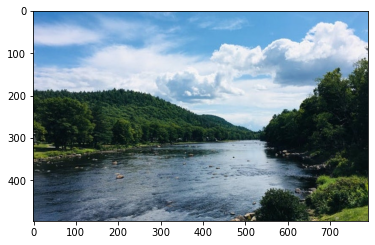

In [4]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
plt.imshow(img)

#### 1.3- Defining Parameters

Define the criteria by which the K-means algorithm is supposed to cluster pixels.

The ‘K’ variable defines the no of clusters/groups that a pixel can belong to (You can increase this value to increase the degree of segmentation).


In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

##### 1 .4 - Apply K-Means

The K variable randomly initiates K different clusters and the ‘center’ variable defines the center of these clusters. The distance of each point from these centers is computed and then they are assigned to one of the clusters. Then they are divided into different segments according to the value of their ‘label variable’.

In [6]:
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

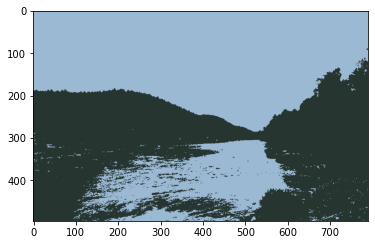

In [7]:
plt.imshow(result_image)

### 2. Image Segmentation using Contour Detection :

#### 2-1 -  Preprocessing the Image


1. Convert the image to grayscale.
2. Compute the threshold of the grayscale image(the pixels above the threshold are converted to white otherwise zero).
3. Apply canny edge detection to the thresholded image before finally using the ‘cv2.dilate’ function to dilate edges detected.

In [23]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

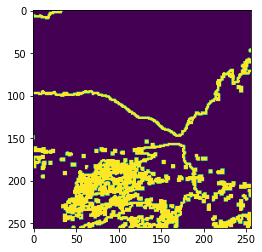

In [24]:
plt.imshow(edges)

#### 2-2  Detecting and Drawing Contours

1- Use the OpenCV find contour function to find all the open/closed regions in the image and store (cnt). 
 <br>
 Use the -1 subscript since the function returns a two-element tuple.
<br>
2- Pass them through the sorted function to access the largest contours first.
<br>
3- Create a zero pixel mask that has equal shape and size to the original image.
<br>
4- Draw the detected contours on the created mask.


In [25]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

#### 2-3 Segmenting the Regions

In order to show only the segmented parts of the image, we perform a bitwise AND operation on the original image (img) and the mask (containing the outlines of all our detected contours).

Finally, Convert the image back to RGB to see it segmented(while being comparable to the original image).

In [26]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

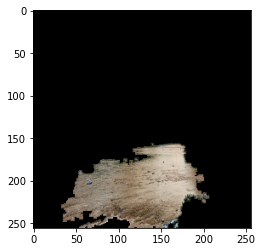

In [27]:
plt.imshow(segmented)

### 3. Image Segmentation using Thresholding

In [28]:
from skimage.filters import threshold_otsu

#### 3.1 Preprocessing the Image

Convert the image to the RBG color space from BGR in order to finally convert it to grayscale.

In [29]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

 #### 3.2 Segmentation Process

<p>Create a “filter_image” function that multiplies the mask (created in the previous section) with the RGB channels of our image. Further, they are concatenated to form a normal image.</p>
</br>
<p>
Next, we calculate the threshold (thresh) for the gray image and use it as a deciding factor i.e. values lying below this threshold are selected and others are discarded. This creates a mask-like (img_otsu) image that can later be used to segment our original image.
</p>
</br>
<p>
Finally, apply the “filter_image” function on the original image(img) and the mask formed using thresholding (img_otsu)
</p>

In [30]:
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh
filtered = filter_image(img, img_otsu)

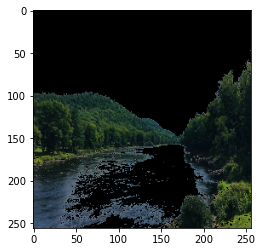

In [35]:
plt.imshow(filtered)

### 4. Segmentation using Color Masking

#### 4-1 Preprocessing the Image

OpenCV default colorspace is BGR so we convert it to RGB. Next, we convert it to the HSV colorspace.

In [37]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

#### 4-2 Define the Color Range to be Detected

Define the RGB range for the color we want to detect. Use the OpenCV in range function to create a mask of all the pixels that fall within the range that we defined. It will later help to mask these pixels.

In [42]:
light_green = (40, 40, 40)
dark_greek = (70, 255, 255)
mask = cv2.inRange(hsv_img, light_green, dark_greek)

#### 4-2 Apply the Mask

Use the bitwise AND operation to apply our mask to the query image.

In [43]:
result = cv2.bitwise_and(img, img, mask=mask)

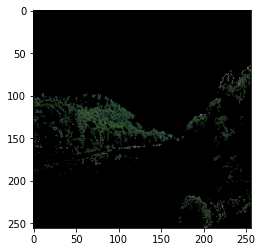

In [44]:
plt.imshow(result)